# Task4 建模调参

### 读取数据

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
sample_feature = reduce_mem_usage(pd.read_csv('../data/data_for_tree.csv'))

Memory usage of dataframe is 62099672.00 MB
Memory usage after optimization is: 16520303.00 MB
Decreased by 73.4%


In [4]:
continuous_feature_names = [i for i in sample_feature.columns if i not in ['price','brand','model','brand']]

## 1. 线性回归模型：

In [5]:
#处理缺失值以及nan
sample_feature = sample_feature.dropna().replace('-',0).reset_index(drop=True)

for i in sample_feature.columns:
    print(i)
    print(sample_feature[i].value_counts())

SaleID
2047      1
72246     1
25113     1
31258     1
147997    1
         ..
99418     1
113757    1
107614    1
149081    1
0         1
Name: SaleID, Length: 91729, dtype: int64
bodyType
0.0    26296
1.0    21383
2.0    19684
3.0     8912
4.0     6140
5.0     4440
6.0     4203
7.0      671
Name: bodyType, dtype: int64
brand
0     19585
4     10317
14     9435
1      8805
10     8515
6      6083
9      4153
5      2905
13     2223
11     1935
3      1693
7      1462
27     1395
25     1316
8      1262
16     1213
15     1030
21     1013
19      900
20      712
22      701
12      699
30      619
17      584
28      420
26      390
32      350
24      264
29      253
37      234
2       220
18      203
31      170
36      146
33      134
34      134
23      110
35      101
38       41
39        4
Name: brand, dtype: int64
fuelType
0.0    58570
1.0    31515
2.0     1335
3.0      189
4.0       86
6.0       17
5.0       17
Name: fuelType, dtype: int64
gearbox
0.0    71628
1.0    20101
Na

13.0     25668
12.0     19752
15.0     18880
50.0      8009
20.0      7241
30.0      3197
65.0      1693
35.0      1615
60.0      1596
25.0      1316
100.0     1030
80.0       420
11.0       390
500.0      253
550.0      234
99.0       151
150.0      146
980.0      134
750.0        4
Name: brand_price_min, dtype: int64
brand_price_std
6260.0     19585
8088.0     10317
3606.0      9435
8992.0      8805
8248.0      8515
4564.0      6083
2976.0      4153
3344.0      2905
3074.0      2223
4724.0      1935
5396.0      1693
4752.0      1462
4852.0      1395
3556.0      1316
6052.0      1262
2450.0      1213
5424.0      1030
5256.0      1013
6188.0       900
4400.0       712
5876.0       701
4066.0       699
3660.0       619
3952.0       584
4508.0       420
10280.0      390
4396.0       350
19856.0      264
3640.0       253
13544.0      234
10576.0      220
6360.0       203
1829.0       170
3922.0       146
554.0        134
9640.0       134
7332.0       110
3326.0       101
2140.0        41


In [6]:
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)

In [7]:
# 用线性模型 所以只使用一些连续值
train = sample_feature[continuous_feature_names+['price']]

train_X = train[continuous_feature_names]
train_y = train['price']

### 建立模型

In [8]:
# 使用sklearn中的LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

model = model.fit(train_X,train_y)

看训练的线性回归模型的截距（intercept）与权重(coef)

In [9]:
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_6', 3367064.3416419136),
 ('v_8', 700675.5609398606),
 ('v_9', 170630.2772321968),
 ('v_7', 32322.661932017396),
 ('v_12', 20473.670796954273),
 ('v_3', 17868.07954149409),
 ('v_11', 11474.938996679144),
 ('v_13', 11261.764560014137),
 ('v_10', 2683.920090624845),
 ('gearbox', 881.8225039247221),
 ('fuelType', 363.9042507216947),
 ('bodyType', 189.6027101207212),
 ('city', 44.94975120522734),
 ('power', 28.55390161675623),
 ('brand_price_median', 0.5103728134078394),
 ('brand_price_std', 0.4503634709263183),
 ('brand_amount', 0.14881120395066025),
 ('brand_price_max', 0.003191018670312208),
 ('SaleID', 5.3559899198622266e-05),
 ('seller', 6.635207682847977e-06),
 ('train', 3.999797627329826e-06),
 ('offerType', 3.6582350730895996e-06),
 ('brand_price_sum', -2.1750068681876487e-05),
 ('name', -0.000298001271304757),
 ('used_time', -0.0025158943328486105),
 ('brand_price_average', -0.4049048451010817),
 ('brand_price_min', -2.246775348688867),
 ('power_bin', -34.42064411728736),
 ('

In [11]:
from matplotlib import pyplot as plt

def plt_sactter(X,y,fea,tilte = 'The predicted price is obvious different from true price'):
    
    subsample_index = np.random.randint(low=0,high=len(train_y),size=50)
    
    plt.scatter(X[fea][subsample_index], y[subsample_index], color='black')
    plt.scatter(X[fea][subsample_index], model.predict(X.loc[subsample_index]), color='blue')
    plt.xlabel(fea)
    plt.ylabel('price')
    plt.legend(['True Price','Predicted Price'],loc='upper right')
    print(tilte)
    plt.show()

The predicted price is obvious different from true price


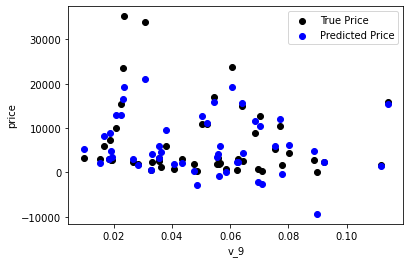

In [12]:
plt_sactter(train_X,train_y,'v_9')

The predicted price is obvious different from true price


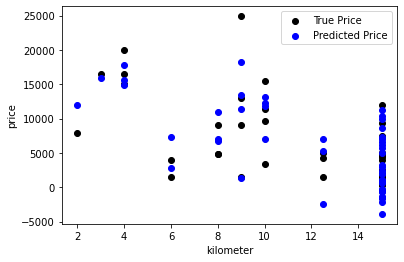

In [13]:
plt_sactter(train_X,train_y,'kilometer')

The predicted price is obvious different from true price


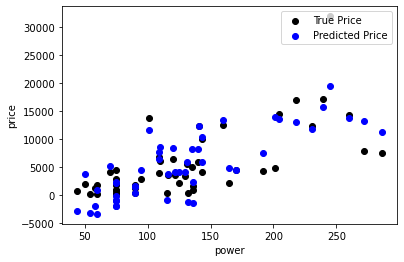

In [14]:
plt_sactter(train_X,train_y,'power')

绘制特征v_9的值与标签的散点图，图片发现模型的预测结果（蓝色点）与真实标签（黑色点）的分布差异较大，且部分预测值出现了小于0的情况，说明我们的模型存在一些问题

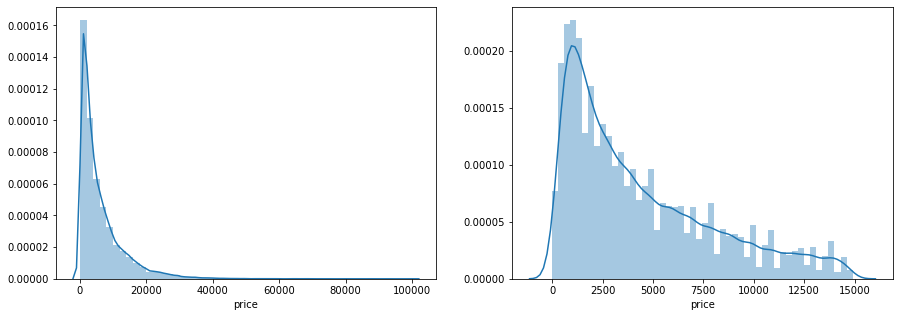

In [39]:
## 看看 y 的分布，看看其分布情况
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y,0.9)])


通过作图我们发现数据的标签（price）呈现长尾分布，不利于我们的建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。参考博客：https://blog.csdn.net/Noob_daniel/article/details/76087829

在这里我们对标签进行了 $log(x+1)$ 变换，使标签贴近于正态分布

In [15]:
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


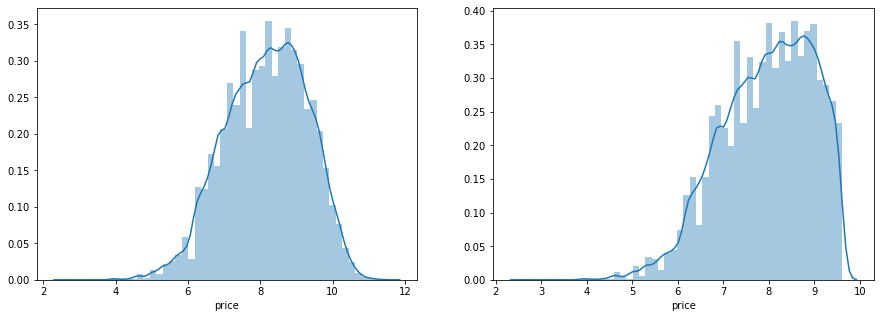

In [16]:
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [24]:
model = model.fit(train_X,train_y)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:-110670.68277629596


[('v_6', 3367064.3416419136),
 ('v_8', 700675.5609398606),
 ('v_9', 170630.2772321968),
 ('v_7', 32322.661932017396),
 ('v_12', 20473.670796954273),
 ('v_3', 17868.07954149409),
 ('v_11', 11474.938996679144),
 ('v_13', 11261.764560014137),
 ('v_10', 2683.920090624845),
 ('gearbox', 881.8225039247221),
 ('fuelType', 363.9042507216947),
 ('bodyType', 189.6027101207212),
 ('city', 44.94975120522734),
 ('power', 28.55390161675623),
 ('brand_price_median', 0.5103728134078394),
 ('brand_price_std', 0.4503634709263183),
 ('brand_amount', 0.14881120395066025),
 ('brand_price_max', 0.003191018670312208),
 ('SaleID', 5.3559899198622266e-05),
 ('seller', 6.635207682847977e-06),
 ('train', 3.999797627329826e-06),
 ('offerType', 3.6582350730895996e-06),
 ('brand_price_sum', -2.1750068681876487e-05),
 ('name', -0.000298001271304757),
 ('used_time', -0.0025158943328486105),
 ('brand_price_average', -0.4049048451010817),
 ('brand_price_min', -2.246775348688867),
 ('power_bin', -34.42064411728736),
 ('

The predicted price seems normal after np.log transforming


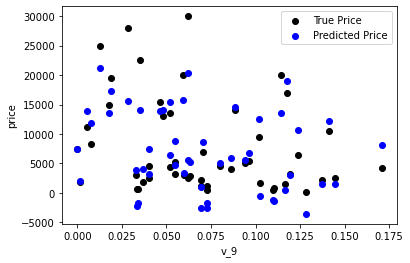

In [18]:
plt_sactter(train_X,train_y,'v_9','The predicted price seems normal after np.log transforming')

### 效果比取对数之前要好很多

## 五折交叉验证

>在使用训练集对参数进行训练的时候，经常会发现人们通常会将一整个训练集分为三个部分（比如mnist手写训练集）。一般分为：训练集（train_set），评估集（valid_set），测试集（test_set）这三个部分。这其实是为了保证训练效果而特意设置的。其中测试集很好理解，其实就是完全不参与训练的数据，仅仅用来观测测试效果的数据。而训练集和评估集则牵涉到下面的知识了。

>因为在实际的训练中，训练的结果对于训练集的拟合程度通常还是挺好的（初始条件敏感），但是对于训练集之外的数据的拟合程度通常就不那么令人满意了。因此我们通常并不会把所有的数据集都拿来训练，而是分出一部分来（这一部分不参加训练）对训练集生成的参数进行测试，相对客观的判断这些参数对训练集之外的数据的符合程度。这种思想就称为交叉验证（Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

# 将测试集合分成5分，分别进行交叉验证
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, 
                         scoring=make_scorer(log_transfer(mean_absolute_error)))
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


array([1.34830381, 1.36349009, 1.38071245, 1.37840115, 1.35810453])

In [26]:
np.mean(scores)

1.3658024042407964

In [37]:
# 对进行对数处理过的标签进行5折交叉验证
scores_log = cross_val_score(model,X=train_X,y=train_y_ln,verbose=1,cv=5,
                             scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [28]:
np.mean(scores_log)

0.19325301535176861

In [38]:
scores_log = pd.DataFrame(scores_log.reshape(1,-1))
scores_log.columns = ['cv'+str(x) for x in range(1,6)]
scores_log.index = ["MAE"]
scores_log

,cv1,cv2,cv3,cv4,cv5
MAE,0.190792,0.193758,0.194132,0.191825,0.195758


但在事实上，由于我们并不具有预知未来的能力，五折交叉验证在某些与时间相关的数据集上反而反映了不真实的情况。通过2018年的二手车价格预测2017年的二手车价格，这显然是不合理的，因此我们还可以采用时间顺序对数据集进行分隔。在本例中，我们选用靠前时间的4/5样本当作训练集，靠后时间的1/5当作验证集，最终结果与五折交叉验证差距不大

In [40]:
import datetime

sample_feature = sample_feature.reset_index(drop=True)
# 分割点
split_point = len(sample_feature) // 5 *4

In [42]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

# 取连续特征
train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price']+1)

val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price']+1)

In [50]:
model = model.fit(train_X,train_y_ln)

In [51]:
mean_absolute_error(val_y_ln,model.predict(val_X))

0.19577667040507402

### 绘制学习曲率线和验证曲线

In [53]:
# 导入sklearn中的 learning_curve , validation_curve
from sklearn.model_selection import learning_curve,validation_curve

? learning_curve

In [57]:
# 绘制学习曲线
def plot_learn_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,
                     train_size = np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    if ylim is not None:  
        plt.ylim(*ylim)  
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, 
        scoring = make_scorer(mean_absolute_error))  
    
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'G:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

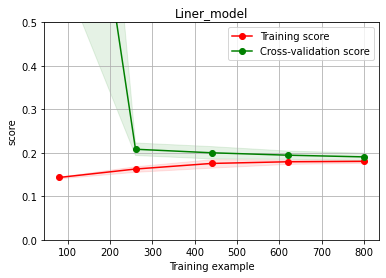

In [58]:
plot_learn_curve(LinearRegression(), 'Liner_model', 
                    train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

### 多种模型对比

In [59]:
train = sample_feature[continuous_feature_names + ['price']].dropna()

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

**线性模型 & 嵌入式特征选择**

嵌入式选择特征是在学习器训练的过程中进行特征选择的，其分类有L1和L2正则化。

在对线性回归模型加入两种正则化方法后，他们分别变成了岭回归与Lasso回归。

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

models = [LinearRegression(),
        Ridge(),
        Lasso()]

In [64]:
result = dict()

for m in models:
    m_name = str(m).split('(')[0]
    score = cross_val_score(m,X=train_X,y=train_y_ln,verbose=0,cv = 5,
                           scoring=make_scorer(mean_absolute_error))
    result[m_name] = score
    print(m_name + ' is finished')


LinearRegression is finished
Ridge is finished
Lasso is finished


In [73]:
    
#三种方法效果对比
result = pd.DataFrame(result)
result.index = ['cv'+str(x) for x in range(1,6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.190792,0.194832,0.383899
cv2,0.193758,0.197632,0.381894
cv3,0.194132,0.198123,0.384090
cv4,0.191825,0.195670,0.380526
cv5,0.195758,0.199676,0.383611


intercept:18.750068110905204


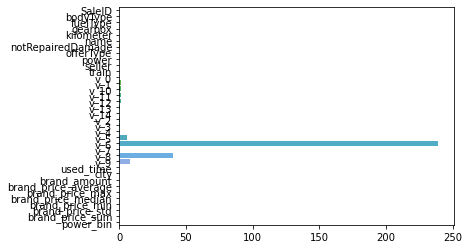

In [74]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

L2正则化在拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』

intercept:4.671710856982987


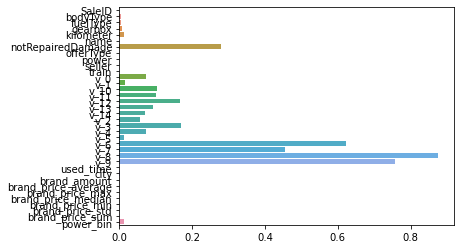

In [75]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择。如下图，我们发现power与userd_time特征非常重要。

intercept:8.67218475447497


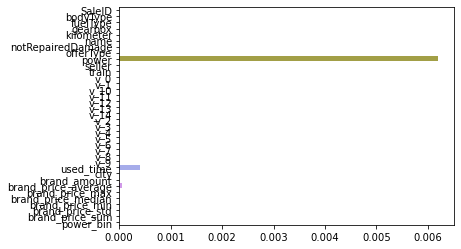

In [76]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

除此之外，决策树通过信息熵或GINI指数选择分裂节点时，优先选择的分裂特征也更加重要，
这同样是一种特征选择的方法。
XGBoost与LightGBM模型中的model_importance指标正是基于此计算的

#### 非线性模型
除了线性模型以外，还有许多我们常用的非线性模型如下，在此篇幅有限不再一一讲解原理。我们选择了部分常用模型与线性模型进行效果比对。

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor


In [79]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [80]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [81]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.190792,0.197285,0.133003,0.168897,547.072868,0.169990,0.141545
cv2,0.193758,0.192859,0.134289,0.171831,301.672924,0.171826,0.145501
cv3,0.194132,0.189598,0.133489,0.170921,387.930132,0.172115,0.143887
cv4,0.191825,0.190200,0.132817,0.169083,611.987152,0.169635,0.142497
cv5,0.195758,0.202709,0.137070,0.174072,272.175556,0.172824,0.144852


### 模型调参¶
在此我们介绍了三种常用的调参方法如下：

* 贪心算法 https://www.jianshu.com/p/ab89df9759c8
* 网格调参 https://blog.csdn.net/weixin_43172660/article/details/83032029
* 贝叶斯调参 https://blog.csdn.net/linxid/article/details/81189154